## Noise_Resilience_Sparse_Projection

In [1]:
import numpy as np
import cvxpy as cp
import sympy as sym
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors

%run Functs.ipynb
%run GSSP.ipynb
%run PGMB.ipynb

In [2]:
train_data = pd.read_csv(r'data.csv', header=None)
train_data.columns=np.arange(train_data.shape[1])

RR = train_data/100
Phi = RR[60:120]
k=10

x0 = np.zeros((48,1))
x0[0] = 1/2
x0[1] = 1/2
W = np.zeros((3,48))

for j in range(3):
    if j >= 1:
        Phi2 = Phi + 0.01*np.random.randn(60,48)
    else: 
        Phi2= Phi
    w_ew = np.dot(Phi2,np.ones((48,1)))/48
    w = PGMB(x0,0.1,1,0.25,0.001, 200, Phi2, w_ew, k)
    W[j] = w.T
print(W[0][0:6])
print(W[1][0:6])
print(W[2][0:6])

[0.14200849 0.38638312 0.         0.         0.         0.        ]
[0.13891056 0.36993706 0.         0.         0.         0.        ]
[0.16080388 0.33686177 0.         0.         0.         0.        ]


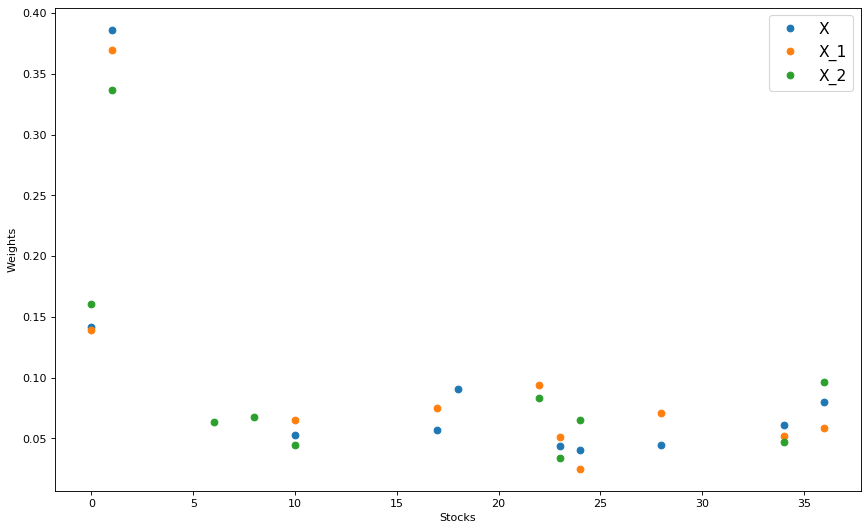

In [3]:
figure(num=None, figsize=(13, 8), dpi=80, facecolor='w', edgecolor='k')

for j in range(3):
    w_current = W[j]
    w_current[w_current == 0] = np.nan
    plt.plot(w_current, 'o')
    
legend = ['X', 'X_1', 'X_2']
plt.legend(legend ,prop={'size': 14})

plt.xlabel('Stocks')
plt.ylabel('Weights')

plt.show()